In [17]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import pickle
#disable warnings
import warnings
warnings.filterwarnings('ignore')
# -----------------------------------------------------------------------------
# 1. Importar y preparar el dataset
# -----------------------------------------------------------------------------
# Leer el archivo CSV
df = pd.read_csv('monthly_data_load.csv')

# Convertir la columna 'date' a datetime con dayfirst=True, puesto que el formato es dd/mm/yyyy
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Preparar el DataFrame para Prophet: renombrar las columnas a 'ds' (fecha) y 'y' (valor)
df_prophet = df.rename(columns={'date': 'ds', 'calls': 'y'}).sort_values('ds')

# -----------------------------------------------------------------------------
# 2. Configuración y ajuste del modelo Prophet
# -----------------------------------------------------------------------------
model = Prophet(
    growth='linear',
    changepoint_prior_scale=0.05,
    seasonality_mode='additive',
    seasonality_prior_scale=5,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_changepoints=10
)

model.fit(df_prophet)

# -----------------------------------------------------------------------------
# 3. Generar el pronóstico
# -----------------------------------------------------------------------------
# Se pronostican 3 períodos (meses) en el futuro usando frecuencia 'MS' (Month Start)
future = model.make_future_dataframe(periods=3, freq='MS')
forecast = model.predict(future)

# -----------------------------------------------------------------------------
# 4. Definir el rango de fechas para visualización
# -----------------------------------------------------------------------------
# Se desea visualizar la serie desde 5 meses antes del último dato observado hasta 3 meses en el futuro
last_date = df_prophet['ds'].max()
start_date = last_date - pd.DateOffset(months=5)
end_date = last_date + pd.DateOffset(months=3)


07:12:04 - cmdstanpy - INFO - Chain [1] start processing


07:12:04 - cmdstanpy - INFO - Chain [1] done processing


In [15]:

# -----------------------------------------------------------------------------
# 5. Crear un diccionario del modelo
# -----------------------------------------------------------------------------
# En este diccionario se incluyen el modelo entrenado, el pronóstico, el DataFrame de entrenamiento
# y los parámetros de fecha que usas para definir el rango
model_dict = {
    'model': model,
    'forecast': forecast,
    'df_prophet': df_prophet,
    'start_date': start_date,
    'last_date': last_date,
    'end_date': end_date
}


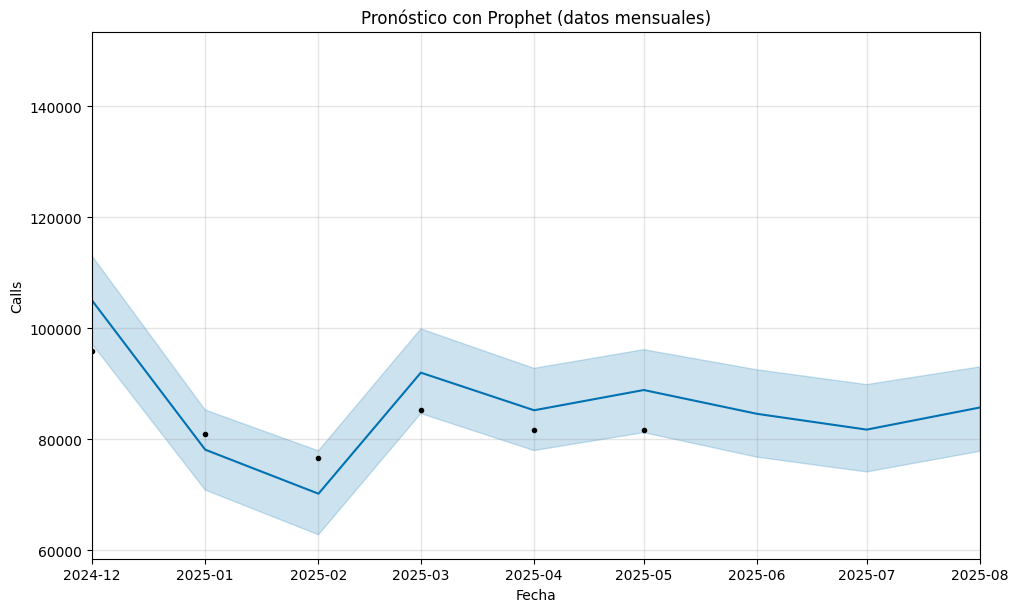

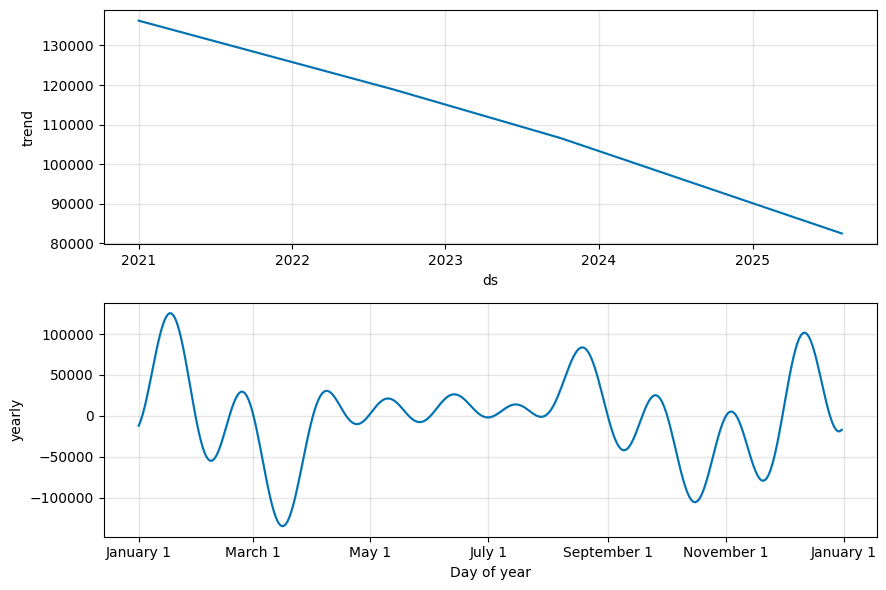

In [16]:

# Guardar el diccionario a un archivo pickle para luego cargarlo en Streamlit
with open('prophet_model_dict.pkl', 'wb') as f:
    pickle.dump(model_dict, f)

# -----------------------------------------------------------------------------
# 6. Opcional: Graficar el pronóstico
# -----------------------------------------------------------------------------
fig = model.plot(forecast)
ax = fig.gca()  # Obtener el objeto Axes para personalizar el gráfico
ax.set_title('Pronóstico con Prophet (datos mensuales)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Calls')
ax.set_xlim([start_date, end_date])
plt.show()

fig2 = model.plot_components(forecast)
plt.show()